# ML1. 머신러닝 소개

## 붓꽃(Iris)의 품종을 분류
- 데이터 불러오기
- 훈련 데이터와 답안 데이터로 나누기
- 데이터 살펴보기
- 모델 생성하기
- (예측하기)
- 모델 평가하기

> 베이스라인 -> 완벽하지 않아도 좋지만 전체 과정을 실행 후 개선점을 빠르게 찾고 반영하기 위한 모델

## ML의 절차

1. 문제 정의 및 방법 결정
1. 데이터 전처리
1. 데이터 불러오기
1. 데이터 나누기
1. 데이터 살펴보기
1. 모델 생성
1. 모델 평가

In [18]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import mglearn
from preamble import *

### 데이터 불러오기

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [7]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
print(iris_dataset["target"].shape)

(150,)


- 'data'는 150개의 행으로 구성됨, 4개의 특징으로 나뉘어져있음.
- 'target'은 150개 행으로 구성됨
- data + target을 하면 전체 데이터로 완성

### 데이터 나누기

In [10]:
from sklearn.model_selection import train_test_split #검증된 랜덤 함수로 섞음
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
# X는 문제, y는 검증용
# random_state=0 : 검증용. 알고리즘 학습할때만 씀

In [11]:
print(X_train.shape, y_train.shape)

(112, 4) (112,)


In [12]:
print(X_test.shape, y_test.shape)

(38, 4) (38,)


### 데이터 살펴보기

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

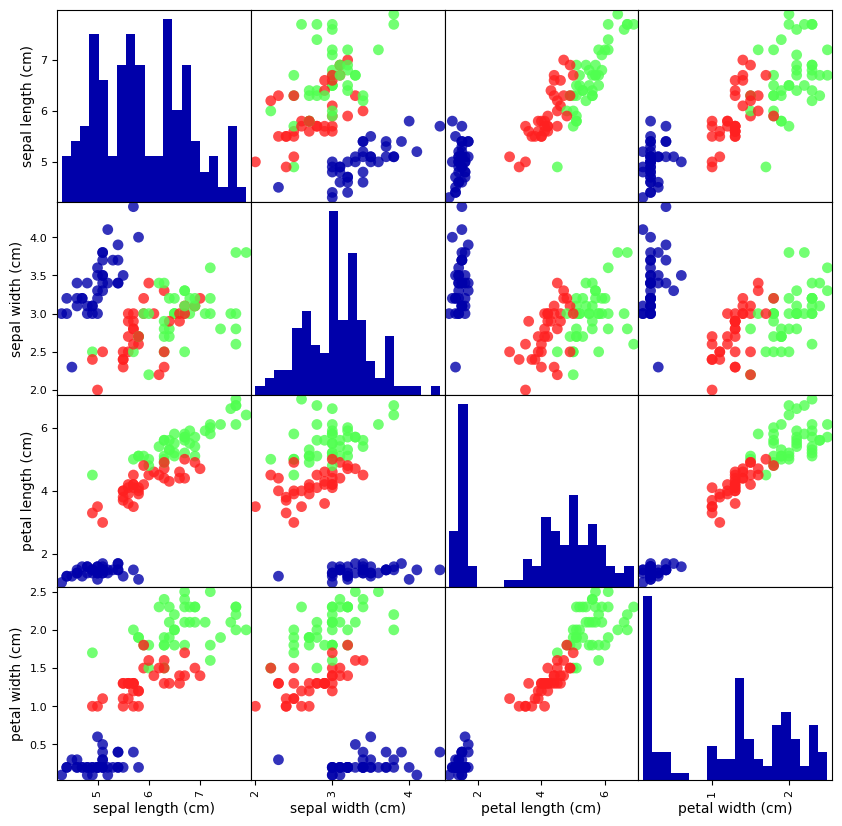

In [13]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

### 모델 생성

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 모델 평가

In [16]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [17]:
np.mean(y_pred == y_test) # np.mean() : 퍼센트 비율로 나타냄

0.9736842105263158